# ABOUT THE PROJECT

## Introduction

The Regulatory Affairs of Road Accident Data 2020 in India project aims to analyze road accident patterns across 50 major Indian cities using comprehensive accident data. By exploring key factors like cause categories, subcategories, and incident outcomes, this project seeks to uncover trends, identify high-risk areas, and examine the relationship between accident causes and their consequences.

Leveraging tools like Python, SQL, and Excel, the analysis provides actionable insights to policymakers, aiding in the formulation of targeted interventions for enhancing road safety. The findings will help address critical issues such as traffic violations, poor infrastructure, and weather-related risks to minimize accidents and fatalities.

# Importing Initial libraries & Modules

In [ ]:
import pandas as pd # for data exploration and manipulating
import numpy as np # for performing numerical operations
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for making diagrams
import plotly.express as px # for graphical representation

# Loading the dataset ( Before ETL )

In [ ]:
initial_df = pd.read_csv('reg.csv')

# Displaying Image ( ETL Process )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Certificates/')

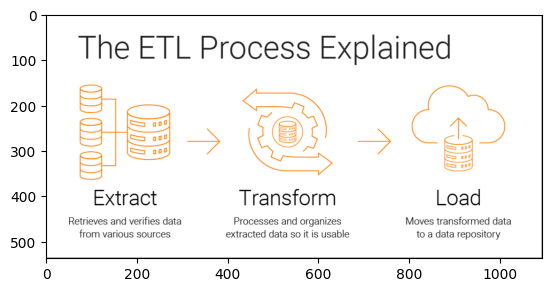

In [ ]:
img = plt.imread('ETL.png')
fig = plt.imshow(img)

# Extract, Transform and Load Process

## Data Cleaning ( Part 1 )

In [ ]:
# Running key_checks for missing and invalid data.
# Manipulating the data for further complex analysis

print(initial_df.isnull().sum())  # Check for missing values
print(initial_df.duplicated().sum())  # Check for duplicates

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64
0


In [ ]:
initial_df = initial_df.drop_duplicates()
initial_df['Count'] = initial_df['Count'].fillna(0)  # Replace NaN in 'Count' with 0

In [ ]:
initial_df.head(5)

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [ ]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9550 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
initial_df.describe()

,Count
count,9550.000000
mean,103.595079
std,275.152200
min,0.000000
25%,0.000000
50%,12.000000
75%,70.000000
max,3148.000000


In [ ]:
initial_df = initial_df.rename(columns={'Million Plus Cities': 'Cities','Cause category':'Cause','Cause Subcategory':'Subcause','Outcome of Incident':'Outcome','Count':'Frequency'})
print(initial_df.columns)

Index(['Cities', 'Cause', 'Subcause', 'Outcome', 'Frequency'], dtype='object')


In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [ ]:
# Convert the 'Count' column from float to object
initial_df['Frequency'] = initial_df['Frequency'].astype(str)

In [ ]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cities     9550 non-null   object
 1   Cause      9550 non-null   object
 2   Subcause   9550 non-null   object
 3   Outcome    9550 non-null   object
 4   Frequency  9550 non-null   object
dtypes: object(5)
memory usage: 373.2+ KB


In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


## Feature Engineering


In [ ]:
# Developing  new features : making new features from existing features

# 1 - Servity Index : Measures accident severity as the ratio of fatalities to total accidents.

# 2 - City Risk Level: Categorizes cities into high, medium, or low risk based on total accident counts.

# 3 - Cause Impact Score: Weights each cause category based on the frequency and severity of outcomes (e.g., fatalities vs. injuries).

# 4 - Weather Influence Score: Quantifies the impact of weather-related causes on total accidents.

# 5 - Junction Risk Score: Evaluates the accident frequency at different types of junctions (e.g., T-junction, roundabouts).

# 6 - Top Cause Contribution: Percentage of accidents caused by the most frequent cause category in a city or overall.

### Servity Index

In [ ]:
# Converting Frequency column to the numeric data
initial_df['Frequency'] = pd.to_numeric(initial_df['Frequency'])

# Creating the Servity index
initial_df['Servity Index'] = initial_df['Frequency'] / initial_df['Frequency'].max()

print(initial_df['Servity Index'])

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
9545    0.178208
9546    0.080051
9547    0.055909
9548    0.383418
9549    0.258259
Name: Servity Index, Length: 9550, dtype: float64


### City Risk Level

In [ ]:
# Defining risk levels
conditions = [
    initial_df['Frequency'] > 1000,    # Adjust thresholds based on your data
    initial_df['Frequency'].between(500, 1000),
    initial_df['Frequency'] < 500
]
labels = ['High', 'Medium', 'Low']

# Create City Risk Level
initial_df['City Risk Level'] = pd.cut(initial_df['Frequency'], bins=[-1, 500, 1000, float('inf')], labels=labels)


In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High


### Cause Impact Score

In [ ]:
# Calculate impact score for each cause
cause_totals = initial_df.groupby('Cause')['Frequency'].sum()
initial_df['Cause Impact Score'] = initial_df['Cause'].map(cause_totals / cause_totals.sum())

print(initial_df['Cause Impact Score'])

0       0.175177
1       0.175177
2       0.175177
3       0.175177
4       0.175177
          ...   
9545    0.175177
9546    0.175177
9547    0.175177
9548    0.175177
9549    0.175177
Name: Cause Impact Score, Length: 9550, dtype: float64


### Outcome Ratio ( Column Dropped )

In [ ]:
# Pivot table to summarize outcomes
outcome_summary = initial_df.groupby(['Cities', 'Outcome'])['Frequency'].sum().unstack(fill_value=0)

# Check if 'Injuries' and 'Fatalities' columns exist before accessing them
if 'Injuries' in outcome_summary.columns and 'Fatalities' in outcome_summary.columns:
    # Add ratio column (example: injuries to fatalities)
    initial_df['Outcome Ratio'] = outcome_summary['Injuries'] / (outcome_summary['Fatalities'] + 1e-5)  # Avoid division by zero
else:
    # Handle the case where 'Injuries' or 'Fatalities' columns are missing
    # For example, you can assign a default value or print a warning message
    initial_df['Outcome Ratio'] = np.nan  # Assign NaN if columns are missing
    print("Warning: 'Injuries' or 'Fatalities' column not found in outcome_summary.")

print(initial_df['Outcome Ratio'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9545   NaN
9546   NaN
9547   NaN
9548   NaN
9549   NaN
Name: Outcome Ratio, Length: 9550, dtype: float64


In [ ]:
initial_df = initial_df.drop(columns=['Outcome Ratio'])

In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High,0.175177
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High,0.175177
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High,0.175177
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High,0.175177
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High,0.175177


### Weather Influence Score

In [ ]:
ramp = initial_df['Subcause'].value_counts()
print(ramp)

Subcause
Others                                              1450
Flashing Signal/Blinker                              250
Over                                                 250
Rainy                                                250
Hail/Sleet                                           250
Foggy and Misty                                      250
Straight Road                                        250
Steep Grade                                          250
Pot Holes                                            250
Ongoing Road Works/Under Construction                250
Curved Road                                          250
Bridge                                               250
Use of Mobile Phone                                  250
Culvert                                              250
Jumping Red Light                                    250
Four arm Junction                                    250
Police Controlled                                    250
Stop Sign             

In [ ]:
# Defining the weather data

# subcauses data ( About weather ) : 'Rainy', 'Hail/Sleet', 'Foggy and Misty', 'Sunny/Clear'

# Define weather-related subcauses
weather_related = ['Rainy', 'Hail/Sleet', 'Foggy and Misty', 'Sunny/Clear']

# Create the Weather Influence Score column
initial_df['Weather Influence Score'] = initial_df['Subcause'].apply(lambda x: 1 if x in weather_related else 0)

print(initial_df['Weather Influence Score'])


0       0
1       0
2       0
3       0
4       0
       ..
9545    1
9546    1
9547    1
9548    1
9549    1
Name: Weather Influence Score, Length: 9550, dtype: int64


In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High,0.175177,0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High,0.175177,0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High,0.175177,0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High,0.175177,0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High,0.175177,0


### Junction Risk Score

In [ ]:
# Define junction-related subcauses
junction_related = ['Four arm Junction', 'Round about Junction', 'Staggered Junction', 'T', 'Y']

# Create the Junction Risk Score column
initial_df['Junction Risk Score'] = initial_df['Subcause'].apply(lambda x: 1 if x in junction_related else 0)


In [ ]:
print(initial_df['Junction Risk Score'])

0       0
1       0
2       0
3       0
4       0
       ..
9545    0
9546    0
9547    0
9548    0
9549    0
Name: Junction Risk Score, Length: 9550, dtype: int64


### Top Cause Contribution

In [ ]:
# Group by city and cause, then calculate percentage contribution
city_cause_totals = initial_df.groupby(['Cities', 'Cause'])['Frequency'].sum()
city_totals = city_cause_totals.groupby('Cities').transform('sum')

# Reset the index of the result to match initial_df
initial_df['Top Cause Contribution'] = (city_cause_totals / city_totals).reset_index(level=[0,1], drop=True)

In [ ]:
print(initial_df['Top Cause Contribution'])

0       0.132597
1       0.173481
2       0.173481
3       0.173481
4       0.173481
          ...   
9545         NaN
9546         NaN
9547         NaN
9548         NaN
9549         NaN
Name: Top Cause Contribution, Length: 9550, dtype: float64


In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High,0.175177,0,0,0.132597
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High,0.175177,0,0,0.173481
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High,0.175177,0,0,0.173481
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High,0.175177,0,0,0.173481
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High,0.175177,0,0,0.173481


### Reseting Index

In [ ]:
initial_df.reset_index(drop=True, inplace=True)

# Exploratory Data Analysis

In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High,0.175177,0,0,0.132597
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High,0.175177,0,0,0.173481
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High,0.175177,0,0,0.173481
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High,0.175177,0,0,0.173481
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High,0.175177,0,0,0.173481


In [ ]:
initial_df.describe()

,Frequency,Servity Index,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
count,9550.000000,9550.000000,9550.000000,9550.000000,9550.000000,300.000000
mean,103.595079,0.032908,0.165553,0.104712,0.130890,0.166667
std,275.152200,0.087405,0.019970,0.306198,0.337298,0.018360
min,0.000000,0.000000,0.124117,0.000000,0.000000,0.117282
25%,0.000000,0.000000,0.175177,0.000000,0.000000,0.173358
50%,12.000000,0.003812,0.175177,0.000000,0.000000,0.174604
75%,70.000000,0.022236,0.175177,0.000000,0.000000,0.175705
max,3148.000000,1.000000,0.175177,1.000000,1.000000,0.176544


In [ ]:
new_df = initial_df.copy()
new_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High,0.175177,0,0,0.132597
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High,0.175177,0,0,0.173481
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High,0.175177,0,0,0.173481
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High,0.175177,0,0,0.173481
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High,0.175177,0,0,0.173481


# Data Visualisation

<ipython-input-36-49cc2e2b46d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cities', y='Frequency', data=new_df, palette='viridis')


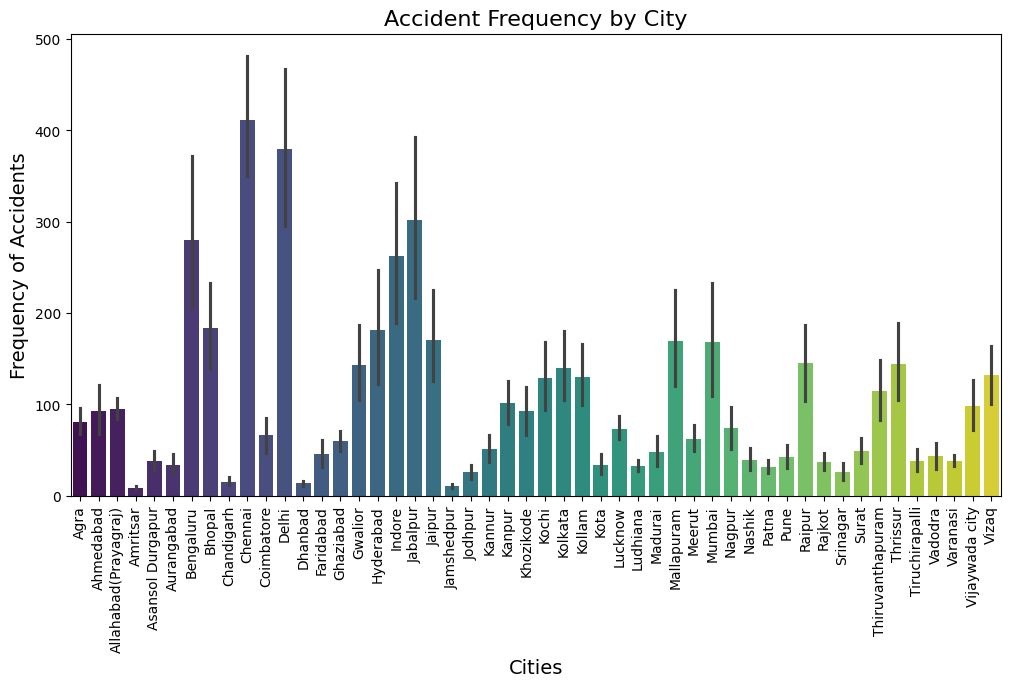

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='Cities', y='Frequency', data=new_df, palette='viridis')
plt.title('Accident Frequency by City', fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Frequency of Accidents', fontsize=14)
plt.xticks(rotation=90)
plt.show()


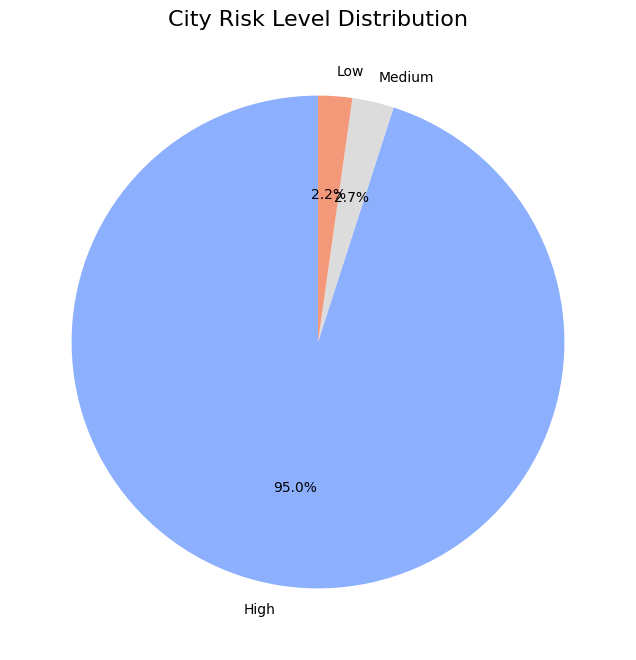

In [ ]:
plt.figure(figsize=(8,8))
city_risk_counts = new_df['City Risk Level'].value_counts()
city_risk_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=3), startangle=90, legend=False)
plt.title('City Risk Level Distribution', fontsize=16)
plt.ylabel('')
plt.show()


<ipython-input-38-f4b8fc34382c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City Risk Level', y='Frequency', data=new_df, palette='coolwarm')


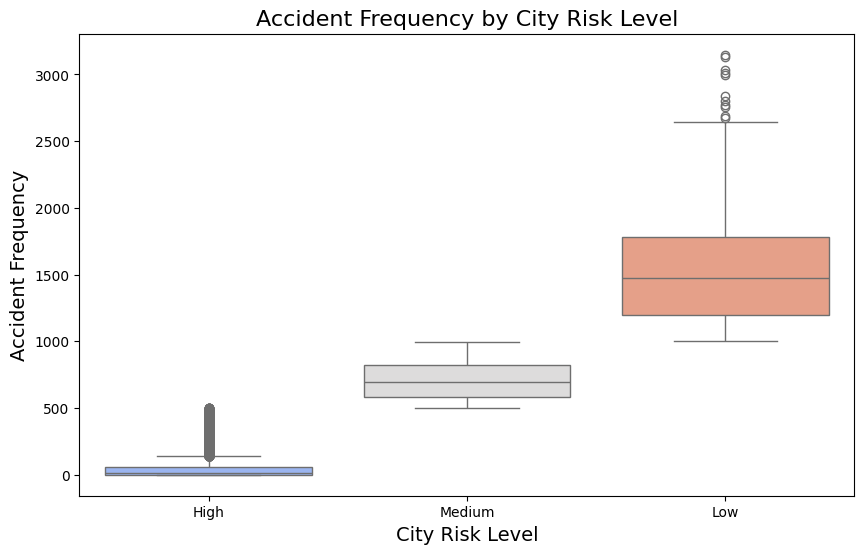

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='City Risk Level', y='Frequency', data=new_df, palette='coolwarm')
plt.title('Accident Frequency by City Risk Level', fontsize=16)
plt.xlabel('City Risk Level', fontsize=14)
plt.ylabel('Accident Frequency', fontsize=14)
plt.show()


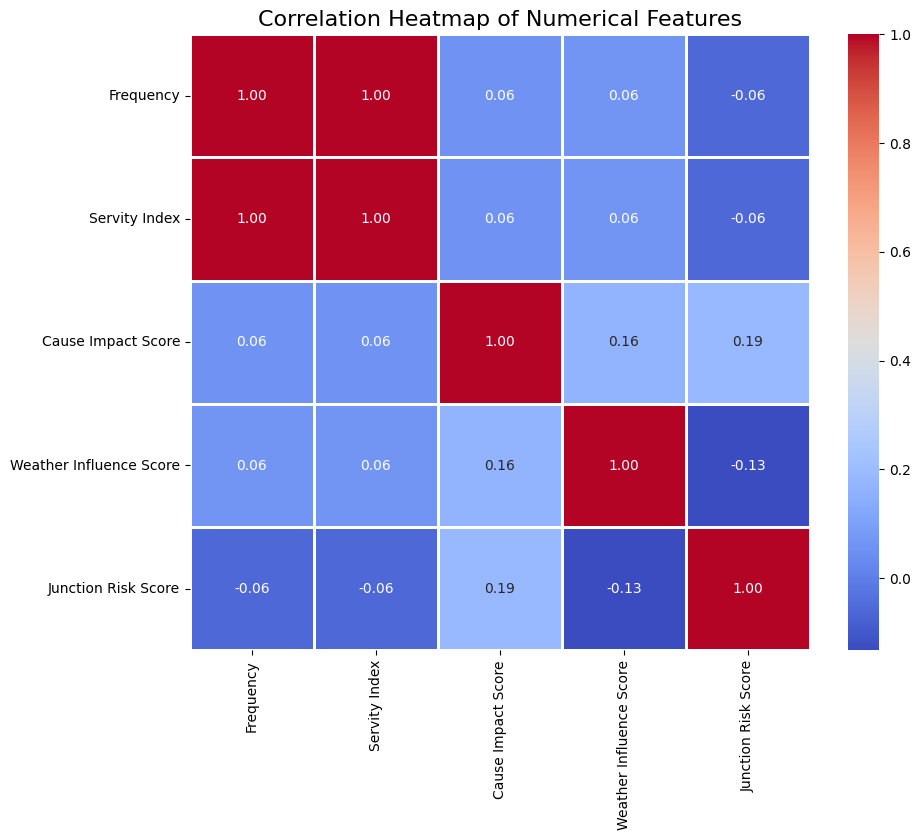

In [ ]:
plt.figure(figsize=(10,8))
correlation = new_df[['Frequency', 'Servity Index', 'Cause Impact Score', 'Weather Influence Score', 'Junction Risk Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


<ipython-input-40-69b4cec5739d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cause', y='Frequency', data=new_df, palette='Set2')


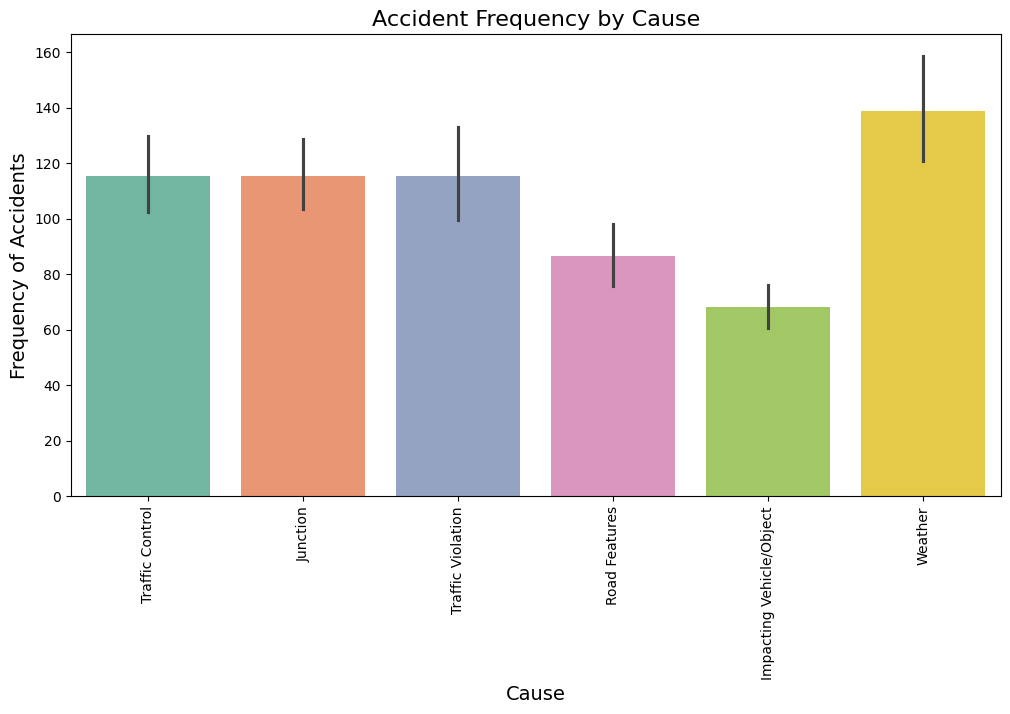

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Cause', y='Frequency', data=new_df, palette='Set2')
plt.title('Accident Frequency by Cause', fontsize=16)
plt.xlabel('Cause', fontsize=14)
plt.ylabel('Frequency of Accidents', fontsize=14)
plt.xticks(rotation=90)
plt.show()


<ipython-input-41-1779ef55648f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Weather Influence Score', y='Servity Index', data=new_df, palette='muted')


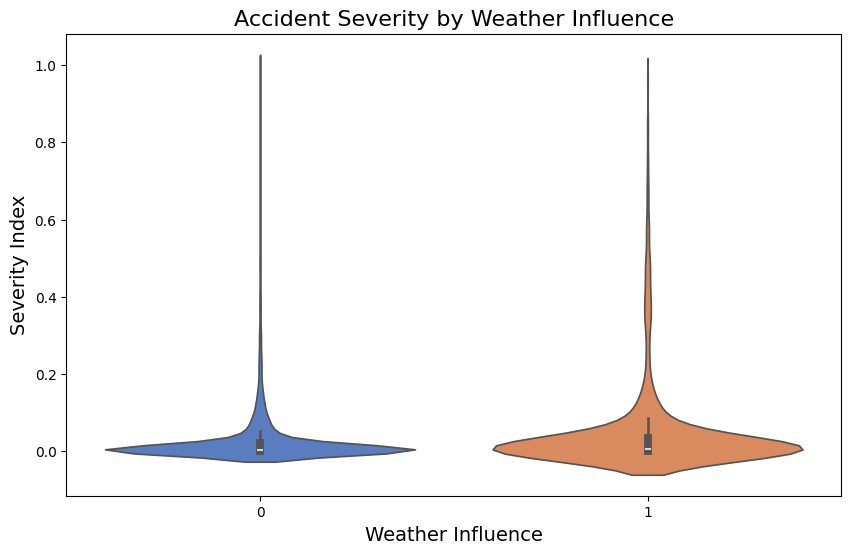

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Weather Influence Score', y='Servity Index', data=new_df, palette='muted')
plt.title('Accident Severity by Weather Influence', fontsize=16)
plt.xlabel('Weather Influence', fontsize=14)
plt.ylabel('Severity Index', fontsize=14)
plt.show()


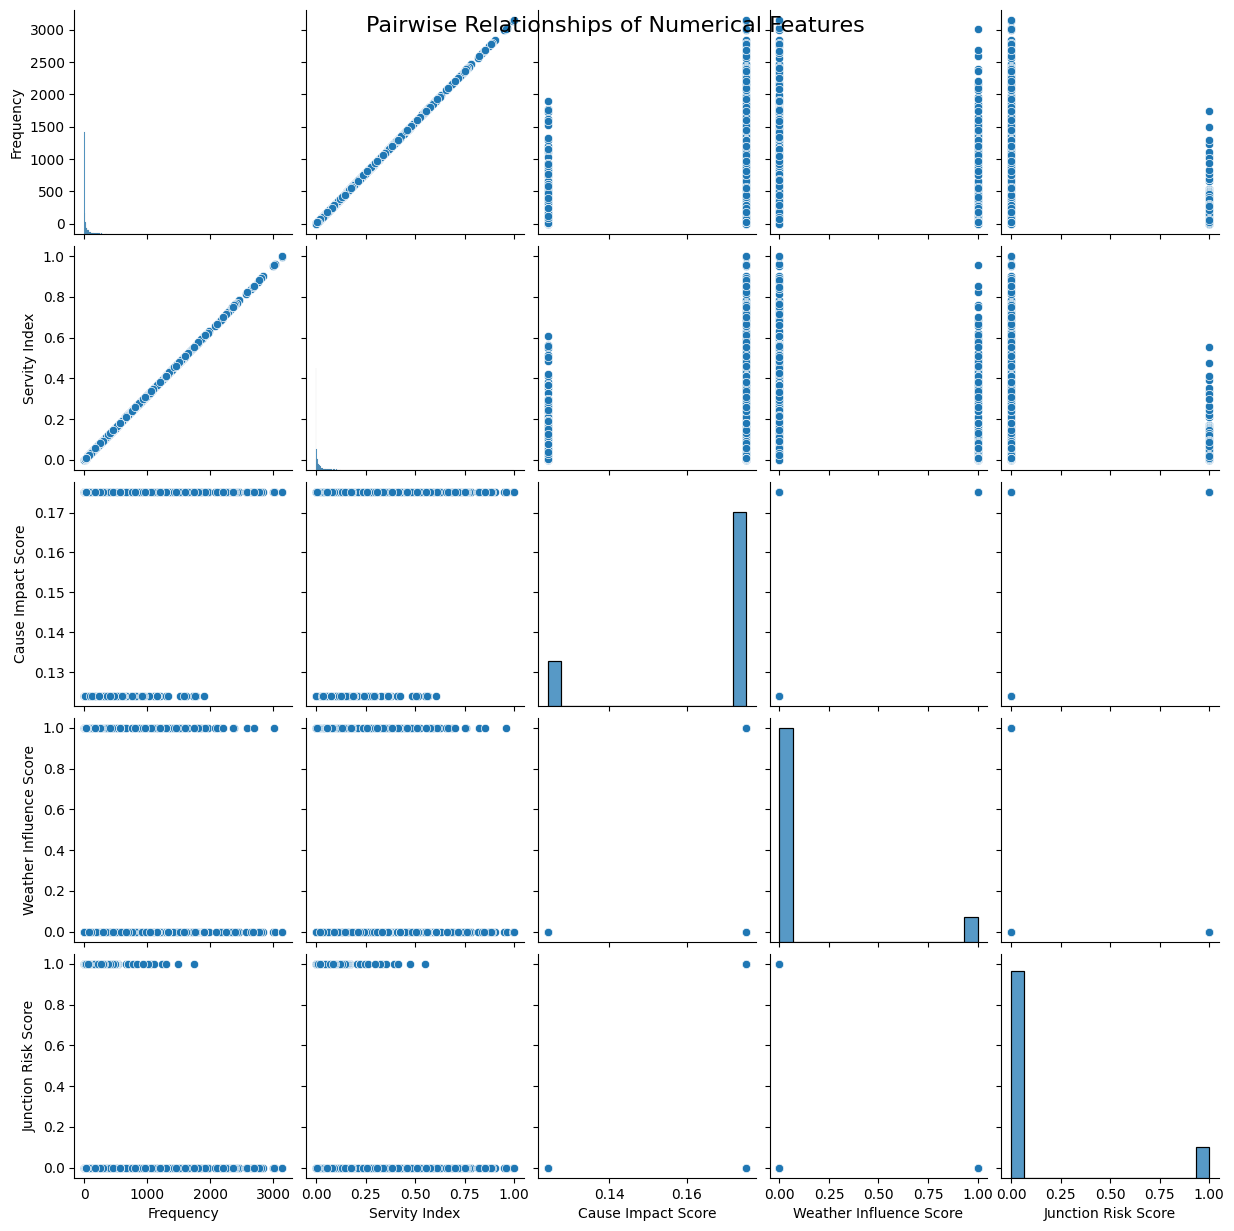

In [ ]:
sns.pairplot(new_df[['Frequency', 'Servity Index', 'Cause Impact Score', 'Weather Influence Score', 'Junction Risk Score']])
plt.suptitle('Pairwise Relationships of Numerical Features', fontsize=16)
plt.show()


<ipython-input-43-b8172cc073a2>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = new_df.pivot_table(values='Frequency', index='City Risk Level', columns='Cause', aggfunc='sum')


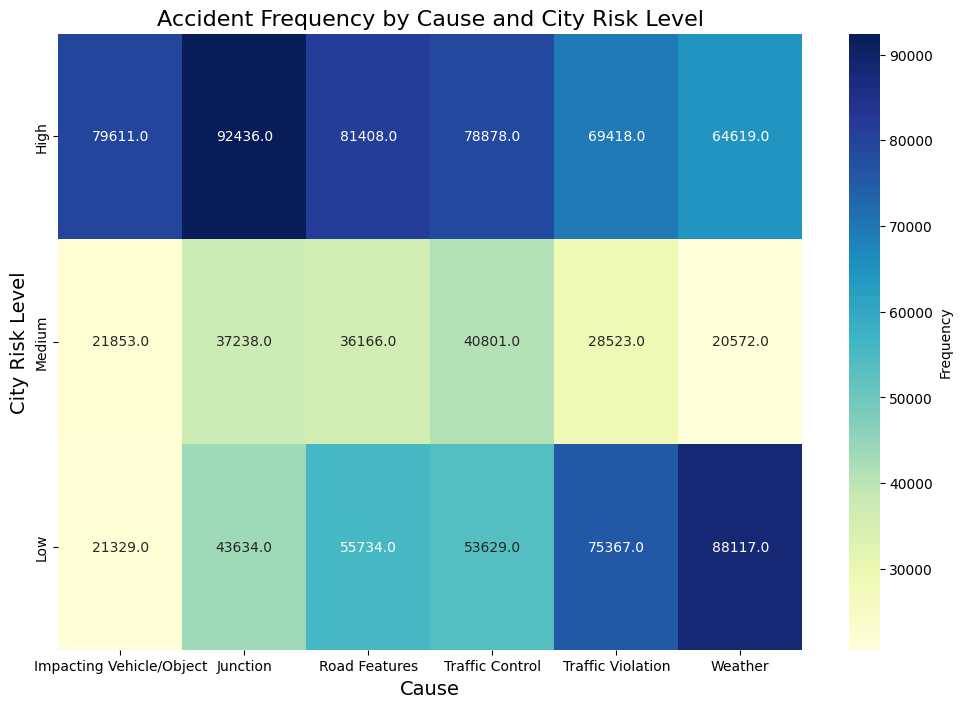

In [ ]:
pivot_table = new_df.pivot_table(values='Frequency', index='City Risk Level', columns='Cause', aggfunc='sum')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Frequency'})
plt.title('Accident Frequency by Cause and City Risk Level', fontsize=16)
plt.xlabel('Cause', fontsize=14)
plt.ylabel('City Risk Level', fontsize=14)
plt.show()


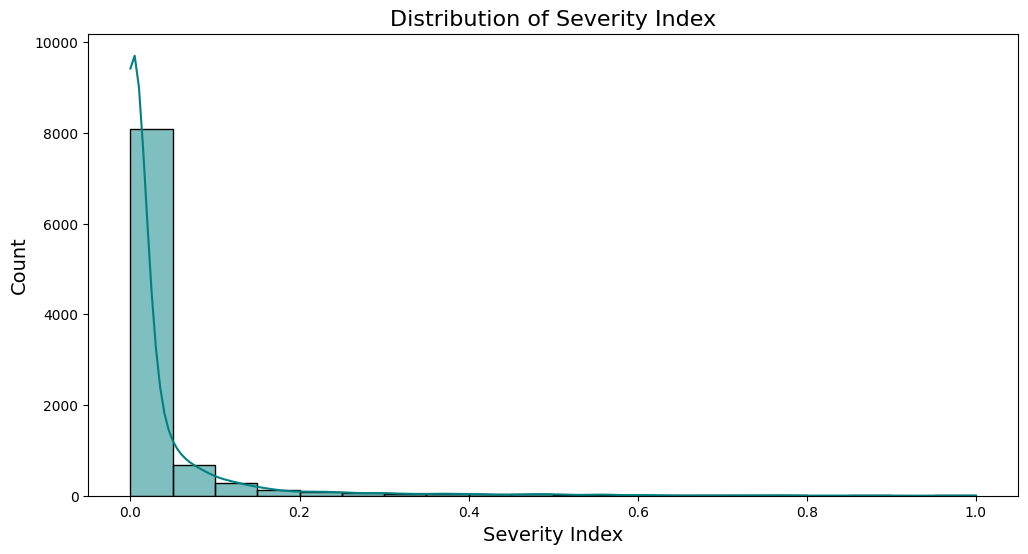

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(new_df['Servity Index'], kde=True, color='teal', bins=20)
plt.title('Distribution of Severity Index', fontsize=16)
plt.xlabel('Severity Index', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LE = LabelEncoder()
OE = OneHotEncoder()

new_df['Cities'] = LE.fit_transform(new_df['Cities'])
new_df['Cause'] = LE.fit_transform(new_df['Cause'])
new_df['Subcause'] = LE.fit_transform(new_df['Subcause'])
new_df['Outcome'] = LE.fit_transform(new_df['Outcome'])
new_df['City Risk Level'] = LE.fit_transform(new_df['City Risk Level'])

In [ ]:
new_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
0,0,3,9,0,0.0,0.0,0,0.175177,0,0,0.132597
1,0,3,9,1,0.0,0.0,0,0.175177,0,0,0.173481
2,0,3,9,2,0.0,0.0,0,0.175177,0,0,0.173481
3,0,3,9,3,0.0,0.0,0,0.175177,0,0,0.173481
4,0,3,9,4,0.0,0.0,0,0.175177,0,0,0.173481


# Data Cleaning ( Part 2 )

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
new_df.isnull().sum()

,0
Cities,0
Cause,0
Subcause,0
Outcome,0
Frequency,0
Servity Index,0
City Risk Level,0
Cause Impact Score,0
Weather Influence Score,0
Junction Risk Score,0


In [ ]:
print(new_df['Top Cause Contribution'].isnull().sum())  # Confirm missing values
print(new_df['Top Cause Contribution'].describe())

9250
count    300.000000
mean       0.166667
std        0.018360
min        0.117282
25%        0.173358
50%        0.174604
75%        0.175705
max        0.176544
Name: Top Cause Contribution, dtype: float64


In [ ]:
# Drop rows where 'Top Cause Contribution' is missing
new_df.dropna(subset=['Top Cause Contribution'], inplace=True)

# Check if missing values are removed
print(new_df.isnull().sum())


Cities                     0
Cause                      0
Subcause                   0
Outcome                    0
Frequency                  0
Servity Index              0
City Risk Level            0
Cause Impact Score         0
Weather Influence Score    0
Junction Risk Score        0
Top Cause Contribution     0
dtype: int64


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_df[['Frequency', 'Servity Index', 'Cause Impact Score', 'Weather Influence Score',
        'Junction Risk Score', 'Top Cause Contribution']] = scaler.fit_transform(
    new_df[['Frequency', 'Servity Index', 'Cause Impact Score', 'Weather Influence Score',
            'Junction Risk Score', 'Top Cause Contribution']]
)

print(new_df.head())


   Cities  Cause  Subcause  Outcome  Frequency  Servity Index  \
0       0      3         9        0  -0.489847      -0.489847   
1       0      3         9        1  -0.489847      -0.489847   
2       0      3         9        2  -0.489847      -0.489847   
3       0      3         9        3  -0.489847      -0.489847   
4       0      3         9        4  -0.489847      -0.489847   

   City Risk Level  Cause Impact Score  Weather Influence Score  \
0                0                 0.0                      0.0   
1                0                 0.0                      0.0   
2                0                 0.0                      0.0   
3                0                 0.0                      0.0   
4                0                 0.0                      0.0   

   Junction Risk Score  Top Cause Contribution  
0                  0.0               -1.858722  
1                  0.0                0.371744  
2                  0.0                0.371744  
3         

In [ ]:
new_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
0,0,3,9,0,-0.489847,-0.489847,0,0.0,0.0,0.0,-1.858722
1,0,3,9,1,-0.489847,-0.489847,0,0.0,0.0,0.0,0.371744
2,0,3,9,2,-0.489847,-0.489847,0,0.0,0.0,0.0,0.371744
3,0,3,9,3,-0.489847,-0.489847,0,0.0,0.0,0.0,0.371744
4,0,3,9,4,-0.489847,-0.489847,0,0.0,0.0,0.0,0.371744


# Data Splitting ( Training and Testing )

In [ ]:
from sklearn.model_selection import train_test_split


X = new_df.drop('City Risk Level', axis=1)
y = new_df['City Risk Level']  # The target column

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 240
Testing set size: 60


# Model Selection ( Approach Classification )

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_test, test_preds)

roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(test_confusion)

Training Accuracy: 99.17%
Testing Accuracy: 100.00%
Training Precision: 0.99
Testing Precision: 1.00
Training Recall: 0.99
Testing Recall: 1.00
Training F1-Score: 0.99
Testing F1-Score: 1.00
ROC-AUC Score: 1.00

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix (Test Data):
[[57  0  0]
 [ 0  1  0]
 [ 0  0  2]]


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

train_preds = dt_model.predict(X_train)
test_preds = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_preds))


Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Training Precision: 1.00
Testing Precision: 1.00
Training Recall: 1.00
Testing Recall: 1.00
Training F1-Score: 1.00
Testing F1-Score: 1.00

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix (Test Data):
[[57  0  0]
 [ 0  1  0]
 [ 0  0  2]]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_preds))


Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Training Precision: 1.00
Testing Precision: 1.00
Training Recall: 1.00
Testing Recall: 1.00
Training F1-Score: 1.00
Testing F1-Score: 1.00

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix (Test Data):
[[57  0  0]
 [ 0  1  0]
 [ 0  0  2]]


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train)

train_preds = gb_model.predict(X_train)
test_preds = gb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_preds))


Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Training Precision: 1.00
Testing Precision: 1.00
Training Recall: 1.00
Testing Recall: 1.00
Training F1-Score: 1.00
Testing F1-Score: 1.00

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix (Test Data):
[[57  0  0]
 [ 0  1  0]
 [ 0  0  2]]


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

svm_model.fit(X_train, y_train)

train_preds = svm_model.predict(X_train)
test_preds = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_preds))


Training Accuracy: 99.58%
Testing Accuracy: 100.00%
Training Precision: 1.00
Testing Precision: 1.00
Training Recall: 1.00
Testing Recall: 1.00
Training F1-Score: 1.00
Testing F1-Score: 1.00

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix (Test Data):
[[57  0  0]
 [ 0  1  0]
 [ 0  0  2]]


## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')

knn_model.fit(X_train, y_train)

train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_preds))


Training Accuracy: 100.00%
Testing Accuracy: 95.00%
Training Precision: 1.00
Testing Precision: 0.97
Training Recall: 1.00
Testing Recall: 0.95
Training F1-Score: 1.00
Testing F1-Score: 0.96

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.50      1.00      0.67         1
           2       0.33      0.50      0.40         2

    accuracy                           0.95        60
   macro avg       0.61      0.82      0.68        60
weighted avg       0.97      0.95      0.96        60


Confusion Matrix (Test Data):
[[55  0  2]
 [ 0  1  0]
 [ 0  1  1]]


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

train_preds = nb_model.predict(X_train)
test_preds = nb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')

train_recall = recall_score(y_train, train_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

train_f1 = f1_score(y_train, train_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_preds))


Training Accuracy: 95.00%
Testing Accuracy: 90.00%
Training Precision: 0.97
Testing Precision: 0.96
Training Recall: 0.95
Testing Recall: 0.90
Training F1-Score: 0.96
Testing F1-Score: 0.93

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        57
           1       0.50      1.00      0.67         1
           2       0.17      0.50      0.25         2

    accuracy                           0.90        60
   macro avg       0.56      0.80      0.62        60
weighted avg       0.96      0.90      0.93        60


Confusion Matrix (Test Data):
[[52  0  5]
 [ 0  1  0]
 [ 0  1  1]]


# Final Model Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib  # For saving the model

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

train_preds = dt_model.predict(X_train)
test_preds = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Check if accuracy is 100%
if test_accuracy == 1.0:
    print(f"Model has 100% Testing Accuracy!")
else:
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Save the trained model if it achieves 100% accuracy
if test_accuracy == 1.0:
    joblib.dump(dt_model, 'final_decision_tree_model.pkl')
    print("Model saved as 'final_decision_tree_model.pkl'")


Model has 100% Testing Accuracy!
Model saved as 'final_decision_tree_model.pkl'


# Model Evaluation ( Cross Validation )

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean() * 100:.2f}%")

Cross-Validation Accuracy: 100.00%


# Dashboard

In [ ]:
initial_df.head()

,Cities,Cause,Subcause,Outcome,Frequency,Servity Index,City Risk Level,Cause Impact Score,Weather Influence Score,Junction Risk Score,Top Cause Contribution
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0,0.0,High,0.175177,0,0,0.132597
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0,0.0,High,0.175177,0,0,0.173481
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0,0.0,High,0.175177,0,0,0.173481
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0,0.0,High,0.175177,0,0,0.173481
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0,0.0,High,0.175177,0,0,0.173481


In [ ]:
import streamlit as st
import plotly.express as px

# Use the already loaded dataset
df = initial_df  # Replace pd.read_csv with initial_df

# Set dashboard theme
st.set_page_config(page_title="City Accident Dashboard", layout="wide", page_icon=":bar_chart:")

# Sidebar for City Selection
st.sidebar.header("Filter Options")
selected_city = st.sidebar.selectbox("Select a City", options=df['Cities'].unique())

# Filter data based on selection
filtered_data = df[df['Cities'] == selected_city]

# Dashboard Title
st.title(f"Accident Insights for {selected_city}")

# Main Metrics
st.markdown("### Key Metrics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Accidents", filtered_data['Frequency'].sum())
col2.metric("Average Severity", f"{filtered_data['Servity Index'].mean():.2f}")
col3.metric("City Risk Level", filtered_data['City Risk Level'].unique()[0])

# Visualizations
st.markdown("### Accident Frequency by Cause")
fig1 = px.bar(filtered_data, x='Cause', y='Frequency', color='Cause', title="Accident Frequency by Cause")
st.plotly_chart(fig1, use_container_width=True)

st.markdown("### Severity Index Distribution")
fig2 = px.box(filtered_data, x='Servity Index', color_discrete_sequence=["#636EFA"])
st.plotly_chart(fig2, use_container_width=True)

st.markdown("### Accident Severity and Weather Influence")
fig3 = px.scatter(filtered_data, x='Servity Index', y='Weather Influence Score', size='Frequency',
                  color='Cause', title="Severity vs Weather Influence")
st.plotly_chart(fig3, use_container_width=True)


2024-12-18 08:43:43.359 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 08:43:43.368 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 08:43:43.510 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-18 08:43:43.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 08:43:43.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 08:43:43.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 08:43:43.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [ ]:
pip install jupyter-server-proxy


In [ ]:
# Save your Streamlit code to a file
streamlit_code = """
import streamlit as st
import plotly.express as px

# Use the already loaded dataset
df = initial_df  # Replace pd.read_csv with initial_df

# Set dashboard theme
st.set_page_config(page_title="City Accident Dashboard", layout="wide", page_icon=":bar_chart:")

# Sidebar for City Selection
st.sidebar.header("Filter Options")
selected_city = st.sidebar.selectbox("Select a City", options=df['Cities'].unique())

# Filter data based on selection
filtered_data = df[df['Cities'] == selected_city]

# Dashboard Title
st.title(f"Accident Insights for {selected_city}")

# Main Metrics
st.markdown("### Key Metrics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Accidents", filtered_data['Frequency'].sum())
col2.metric("Average Severity", f"{filtered_data['Servity Index'].mean():.2f}")
col3.metric("City Risk Level", filtered_data['City Risk Level'].unique()[0])

# Visualizations
st.markdown("### Accident Frequency by Cause")
fig1 = px.bar(filtered_data, x='Cause', y='Frequency', color='Cause', title="Accident Frequency by Cause")
st.plotly_chart(fig1, use_container_width=True)

st.markdown("### Severity Index Distribution")
fig2 = px.box(filtered_data, x='Servity Index', color_discrete_sequence=["#636EFA"])
st.plotly_chart(fig2, use_container_width=True)

st.markdown("### Accident Severity and Weather Influence")
fig3 = px.scatter(filtered_data, x='Servity Index', y='Weather Influence Score', size='Frequency',
                  color='Cause', title="Severity vs Weather Influence")
st.plotly_chart(fig3, use_container_width=True)
"""

# Write the code to a file named `dashboard_app.py`
with open("dashboard_app.py", "w") as file:
    file.write(streamlit_code)


In [ ]:
!streamlit run dashboard_app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.16.161:8501

  Stopping...
^C
